In [1]:
%load_ext autoreload
%autoreload 2
from scipy.integrate import odeint
from utils import *

In [2]:
(ddx_func, ddy_func, ddθ_func, ddϕ_func) = dynamics_eq()

In [3]:
# Dynamics constants
# yapf: disable
g = 9.807         # gravity (m / s**2)
mQ = 2.5           # mass (kg)
l = 1.0           # half-length (m)
IQ = 1.0         # moment of inertia about the out-of-plane axis (kg * m**2)
# yapf: enable

# Pendulum
mp = mQ*4
L = l*2
Ip = mp*(L/2)**2

# LQR Controller

# Dynamic Modeling

In [4]:
def qaud_dyn(s,t,u):
    '''
    Input:
    - s: states of the system in numpy matrix (4x1 vector) [x, th, dx, dth]
    - params: dictionary of parameter values
    - des: xdes, dxdes
    ------
    Output:
    - ds/dt: derivative states vector (4x1 vector) [dx, dth, ddx, ddth]
    '''
   
    x = s[0]
    y = s[1]
    θ = s[2]
    ϕ = s[3]
    dx = s[4]
    dy = s[5]
    dθ = s[6]
    dϕ = s[7]
    
    
    T1 = (mp+mQ)*g/2 # constant force (Need to add controller)
    T2 = (mp+mQ)*g/2 # constant force (Need to add controller)
    
    
    ddx = ddx_func(Ip, mp, L, ϕ, dϕ, IQ, mQ, l, θ, dθ, T1, T2, g)
    ddy = ddy_func(Ip, mp, L, ϕ, dϕ, IQ, mQ, l, θ, dθ, T1, T2, g)
    ddθ = ddθ_func(Ip, mp, L, ϕ, dϕ, IQ, mQ, l, θ, dθ, T1, T2, g)
    ddϕ = ddϕ_func(Ip, mp, L, ϕ, dϕ, IQ, mQ, l, θ, dθ, T1, T2, g)
    
    ds= [dx, dy, dθ, dϕ, ddx, ddy, ddθ, ddϕ]
    

    return ds

In [5]:
d2r = np.pi/180
r2d = 180/np.pi

In [10]:
#now make the time series
max_time = 30
Sec_sub = 10 #second subdivision (frequency/Hz)
dt = 1/Sec_sub #useful for the animation function
t = np.linspace(0,max_time,int(Sec_sub*max_time))
s2_init_list = [[0,0,0,-30*d2r,0,0,0,0]]

#integrate dynamics output
s2_t_list = []
for s2_0 in s2_init_list:
    s2_t_out = odeint(qaud_dyn,s2_0,t, args=(np.array([0,0]),))
    s2_t_list.append(s2_t_out)

In [11]:
s2_t = s2_t_list[0]
animate_planar_quad_with_inverted_pendulum(t, s2_t[:,0], s2_t[:,1], s2_t[:,2], s2_t[:,3], display_in_notebook=True)

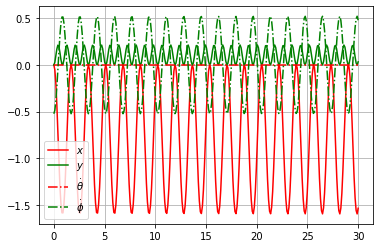

In [12]:
#Now plot the angle vs time
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t,s2_t[:,0],'r',label='$x$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,1],'g',label='$y$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,2],'-.r',label='$\\dot{\\theta}$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,3],'-.g',label='$\\dot{\\phi}$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend() #show the legend

plt.show() #this says display the info here

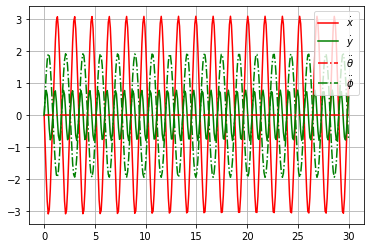

In [13]:
#Now plot the velocity vs time
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t,s2_t[:,4],'r',label='$\\dot{x}$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,5],'g',label='$\\dot{y}$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,6],'-.r',label='$\\ddot{\\theta}$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t,s2_t[:,7],'-.g',label='$\\ddot{\\phi}$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend() #show the legend

plt.show() #this says display the info here